### Importación de datos



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
# Crear un diccionario con los dataframes
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4,
}

In [15]:
# Calcular ingresos automáticamente
ingresos = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}

In [16]:
# Mostrar resultados
for nombre, ingreso in ingresos.items():
    print(f"{nombre}: ${ingreso:,.2f}")

Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


In [53]:
# Configuración del estilo

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Crear DataFrame resumen para graficar
import pandas as pd

ingresos_df = pd.DataFrame({
    'Tienda': list(ingresos.keys()),
    'Ingreso Total': list(ingresos.values())
})

<ipython-input-62-efaf65000843>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=ingresos_df, x='Tienda', y='Ingreso Total', palette='viridis')


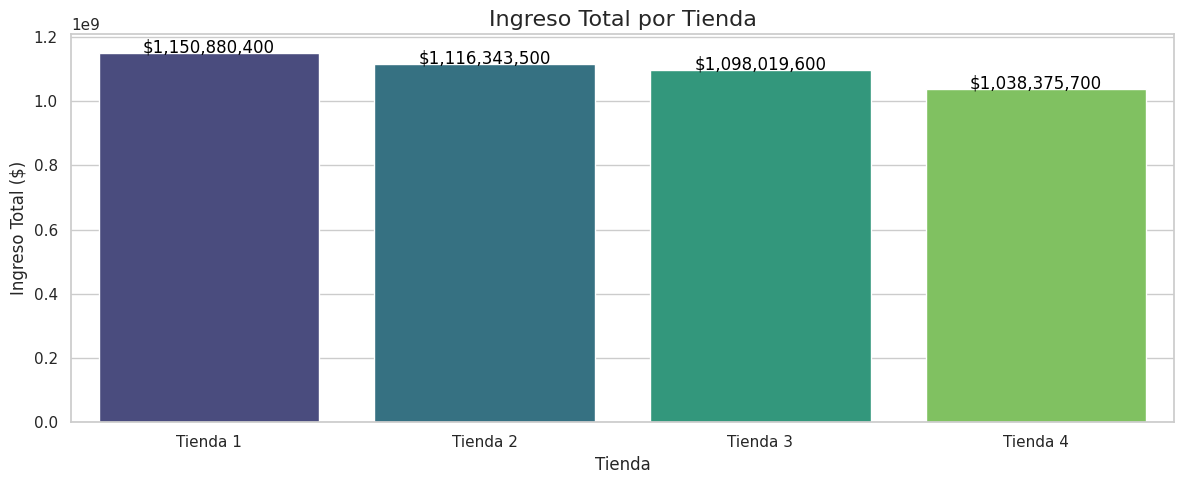

In [62]:
# Crear gráfico
plt.figure(figsize=(12, 5))
barplot = sns.barplot(data=ingresos_df, x='Tienda', y='Ingreso Total', palette='viridis')

# Etiquetas en las barras
for index, row in ingresos_df.iterrows():
    barplot.text(index, row['Ingreso Total'] + 500, f"${row['Ingreso Total']:,.0f}", color='black', ha="center")

# Títulos y etiquetas
plt.title("Ingreso Total por Tienda", fontsize=16)
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total ($)")
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

In [58]:
# Agrupar por Categoría del Producto y contar ventas
ventas_t1 = tienda['Categoría del Producto'].value_counts().reset_index()
ventas_t1.columns = ['Categoría', 'Cantidad']
ventas_t1['Tienda'] = 'Tienda 1'

ventas_t2 = tienda2['Categoría del Producto'].value_counts().reset_index()
ventas_t2.columns = ['Categoría', 'Cantidad']
ventas_t2['Tienda'] = 'Tienda 2'

ventas_t3 = tienda3['Categoría del Producto'].value_counts().reset_index()
ventas_t3.columns = ['Categoría', 'Cantidad']
ventas_t3['Tienda'] = 'Tienda 3'

ventas_t4 = tienda4['Categoría del Producto'].value_counts().reset_index()
ventas_t4.columns = ['Categoría', 'Cantidad']
ventas_t4['Tienda'] = 'Tienda 4'

# Unir todos los dataframes
ventas_cat = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], ignore_index=True)
ventas_cat

,Categoría,Cantidad,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
7,Artículos para el hogar,171,Tienda 1
8,Muebles,442,Tienda 2
9,Electrónicos,422,Tienda 2


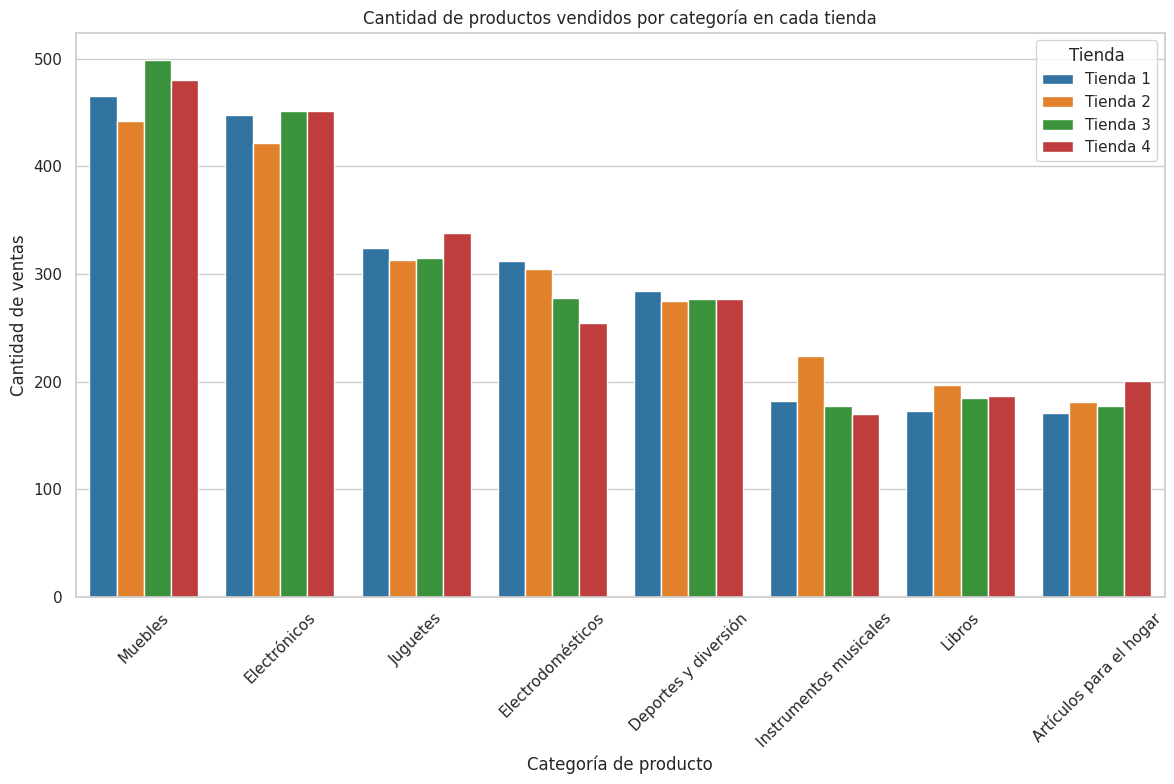

In [61]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Gráfico de barras
sns.barplot(data=ventas_cat, x='Categoría', y='Cantidad', hue='Tienda', palette='tab10')

# Estética
plt.title('Cantidad de productos vendidos por categoría en cada tienda', fontsize=12)
plt.xlabel('Categoría de producto')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tienda')

# Mostrar
plt.show()

# 3. Calificación promedio de la tienda


In [63]:
# Calificaciones promedio por tienda
calificacion_t1 = tienda['Calificación'].mean()
calificacion_t2 = tienda2['Calificación'].mean()
calificacion_t3 = tienda3['Calificación'].mean()
calificacion_t4 = tienda4['Calificación'].mean()
# Crear DataFrame resumen
df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [calificacion_t1, calificacion_t2, calificacion_t3, calificacion_t4]
})

In [64]:
print(df_calificaciones)

     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


<ipython-input-66-79a6dbe3cce4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_calificaciones, x='Tienda', y='Calificación Promedio', palette='pastel')


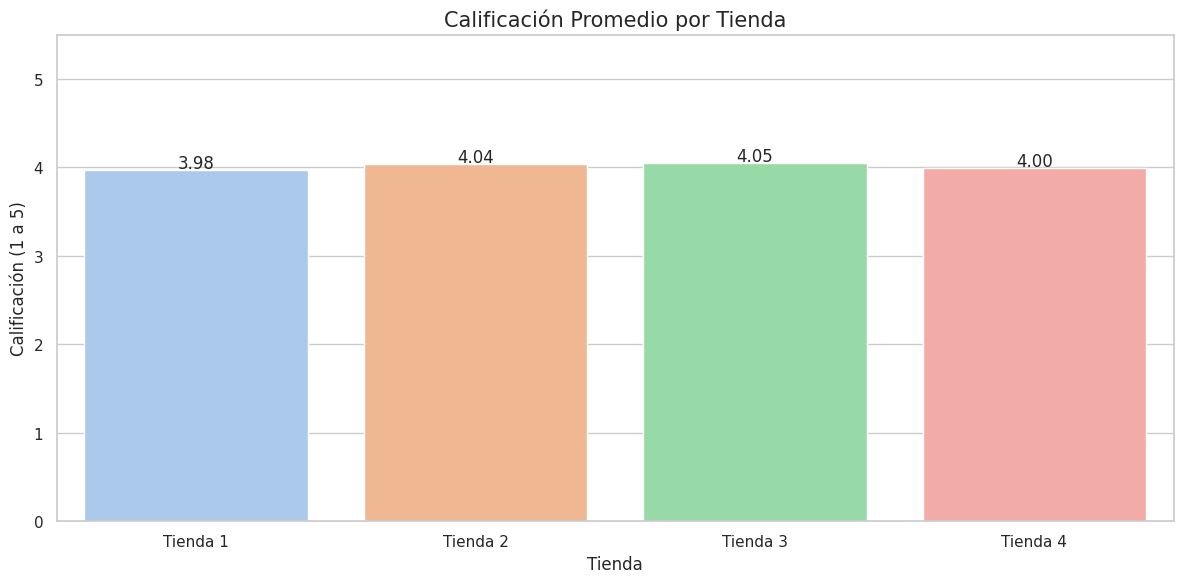

In [66]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Gráfico
sns.barplot(data=df_calificaciones, x='Tienda', y='Calificación Promedio', palette='pastel')

# Etiquetas en las barras
for i, row in df_calificaciones.iterrows():
    plt.text(i, row['Calificación Promedio'] + 0.02, f"{row['Calificación Promedio']:.2f}",
             ha='center', fontsize=12)

# Estética
plt.title('Calificación Promedio por Tienda', fontsize=15)
plt.ylim(0, 5.5)
plt.ylabel('Calificación (1 a 5)')
plt.xlabel('Tienda')
plt.tight_layout()

plt.show()

# 4. Productos más y menos vendidos

In [10]:
# Conteo de productos por tienda
productos_t1 = tienda['Producto'].value_counts().reset_index()
productos_t1.columns = ['Producto', 'Ventas']
productos_t1['Tienda'] = 'Tienda 1'

productos_t2 = tienda2['Producto'].value_counts().reset_index()
productos_t2.columns = ['Producto', 'Ventas']
productos_t2['Tienda'] = 'Tienda 2'

productos_t3 = tienda3['Producto'].value_counts().reset_index()
productos_t3.columns = ['Producto', 'Ventas']
productos_t3['Tienda'] = 'Tienda 3'

productos_t4 = tienda4['Producto'].value_counts().reset_index()
productos_t4.columns = ['Producto', 'Ventas']
productos_t4['Tienda'] = 'Tienda 4'

# Función auxiliar
def resumen_ventas(df, tienda):
    mas_vendido = df.loc[df['Ventas'].idxmax()]
    menos_vendido = df.loc[df['Ventas'].idxmin()]
    return pd.DataFrame({
        'Tienda': [tienda, tienda],
        'Tipo': ['Más vendido', 'Menos vendido'],
        'Producto': [mas_vendido['Producto'], menos_vendido['Producto']],
        'Ventas': [mas_vendido['Ventas'], menos_vendido['Ventas']]
    })

# Aplicar a cada tienda
resumen_t1 = resumen_ventas(productos_t1, 'Tienda 1')
resumen_t2 = resumen_ventas(productos_t2, 'Tienda 2')
resumen_t3 = resumen_ventas(productos_t3, 'Tienda 3')
resumen_t4 = resumen_ventas(productos_t4, 'Tienda 4')

# Unir todo
resumen_final = pd.concat([resumen_t1, resumen_t2, resumen_t3, resumen_t4], ignore_index=True)
print(resumen_final)

     Tienda           Tipo                   Producto  Ventas
0  Tienda 1    Más vendido                 Microondas      60
1  Tienda 1  Menos vendido  Auriculares con micrófono      33
2  Tienda 2    Más vendido  Iniciando en programación      65
3  Tienda 2  Menos vendido              Juego de mesa      32
4  Tienda 3    Más vendido              Kit de bancas      57
5  Tienda 3  Menos vendido    Bloques de construcción      35
6  Tienda 4    Más vendido                   Cama box      62
7  Tienda 4  Menos vendido         Guitarra eléctrica      33


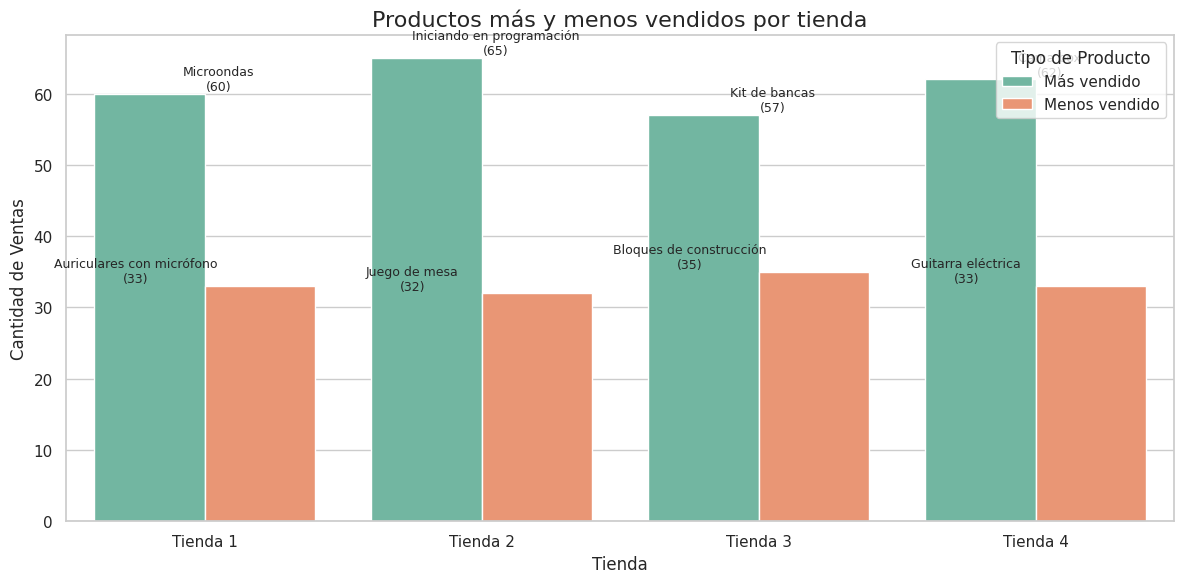

In [13]:
# Import the necessary library
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Gráfico
sns.barplot(data=resumen_final, x='Tienda', y='Ventas', hue='Tipo', palette='Set2')

# Añadir etiquetas
for i in range(len(resumen_final)):
    fila = resumen_final.iloc[i]
    plt.text(
        x=i//2 + (0.05 if fila['Tipo'] == 'Más vendido' else -0.25),
        y=fila['Ventas'] + 0.5,
        s=f"{fila['Producto']}\n({fila['Ventas']})",
        ha='center', fontsize=9
    )

# Estética
plt.title('Productos más y menos vendidos por tienda', fontsize=16)
plt.ylabel('Cantidad de Ventas')
plt.xlabel('Tienda')
plt.tight_layout()
plt.legend(title='Tipo de Producto')

plt.show()

# 5. Envío promedio por tienda

In [14]:
# Cálculo del costo de envío promedio
costo_envio_t1 = tienda['Costo de envío'].mean()
costo_envio_t2 = tienda2['Costo de envío'].mean()
costo_envio_t3 = tienda3['Costo de envío'].mean()
costo_envio_t4 = tienda4['Costo de envío'].mean()

# DataFrame resumen
df_envio = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo Envío Promedio': [costo_envio_t1, costo_envio_t2, costo_envio_t3, costo_envio_t4]
})

print(df_envio)

     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


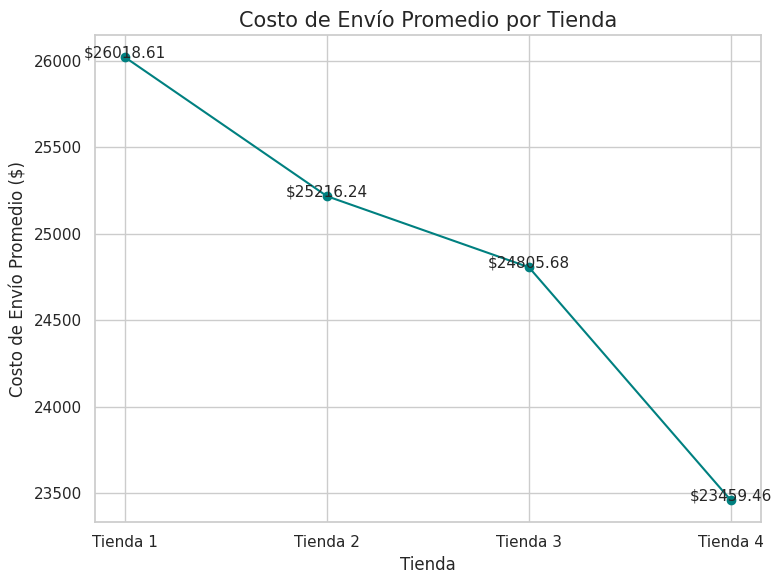

In [15]:
# Estilo
sns.set(style="whitegrid")

# Crear gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(df_envio['Tienda'], df_envio['Costo Envío Promedio'], marker='o', linestyle='-', color='teal')

# Etiquetas en los puntos
for i, row in df_envio.iterrows():
    plt.text(i, row['Costo Envío Promedio'] + 0.1, f"${row['Costo Envío Promedio']:.2f}",
             ha='center', fontsize=11)

# Estética
plt.title('Costo de Envío Promedio por Tienda', fontsize=15)
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')
plt.grid(True)
plt.tight_layout()

plt.show()